# Clustering
[Source](https://scikit-learn.org/stable/modules/clustering.html)
### Many different algortihms with very different results
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Part 1
##### When doing these exercises print your data often to see what you get from the algorithms
1. Create a synthetic dataset with sklearn.datasets.make_classification
  - `X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)`
  - X represents the 2 features in a list
  - y represents the classification label for each feature set
2. Based on the labels scatter plot each of the 1000 entries in one of 2 different colors
3. Now without knowing the labels (we do know them ofcourse) we will try different algorithms on the data
    - import AffinityPropagation from sklearn.cluster 
    - Create a model: `model = AffinityPropagation(damping=0.7)`
    - Fit the model with the data from the features (X): `model.fit(X)`
    - And assign cluster to each sample: `p=model.predict(X)`
    - Find the unique clusters with `np.unique()` method
    - Scatterplot each sample, colored by its cluster
    - Compare with the scatterplot of the actual classifications
4. Try with cluster algorithm: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    - Use the documentation to create DBSCAN clusters for the feature samples
    - Scatter plot the result
5. Do the same with [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)
6. Finally do it with the the [Birch algortihm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
    - You could try to with the [Gaussian Mixture algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

### Part 2
Code along and follow the steps in [this tutorial](https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python#1-loading-the-dataset--exploratory-data-analysis) to use DBSCAN clustering algorithm on articles to try and categorise them into topics. HINT: Install Spacy with following command `!pip install -U pip setuptools wheel && pip install -U spacy && python -m spacy download en_core_web_sm`

[Find more about NLP with Spacy here](https://spacy.io/usage/spacy-101)

**What is Lemmatization? Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.**

For PCA use this import: `from sklearn.decomposition import PCA` (dimensionality reduction)
For K-Means clustering algorithm: `from sklearn.cluster import KMeans, DBSCAN`

Create a function that can take a cluster number and return all titles in that cluster. Do you see any pattern?

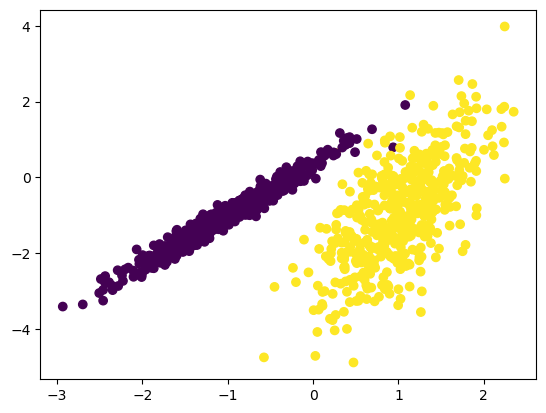

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.scatter(X[:,0], X[:,1], c=Y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


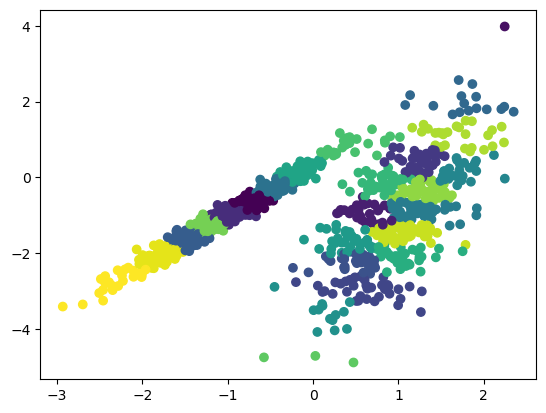

In [4]:
from sklearn.cluster import AffinityPropagation 

affinity = AffinityPropagation(damping=0.7)
affinity_p = affinity.fit_predict(X)
unique = np.unique(affinity_p)
print(unique)

plt.scatter(X[:,0], X[:,1], c=affinity_p)

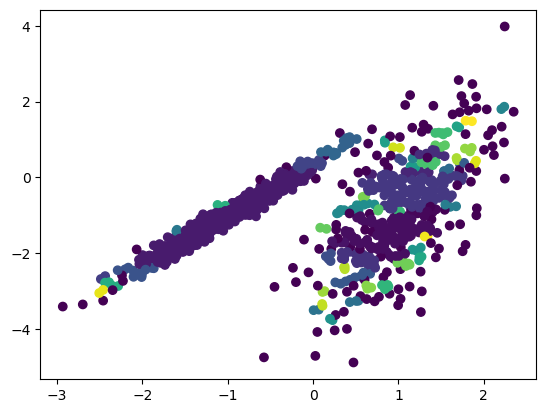

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2).fit(X)
labels = dbscan.labels_

plt.scatter(X[:,0], X[:,1], c=labels)

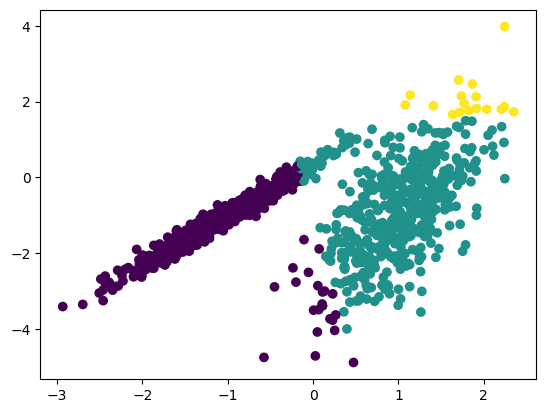

In [17]:
from sklearn.cluster import MeanShift

meanshift = MeanShift().fit(X)
labels = meanshift.labels_

plt.scatter(X[:,0], X[:,1], c=labels)

{0, 1, 2}


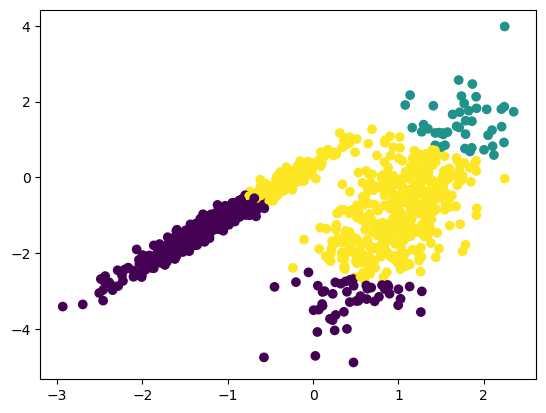

In [32]:
from sklearn.cluster import Birch

birch = Birch().fit(X)

labels = birch.labels_
print(set(labels))

plt.scatter(X[:,0], X[:,1], c=labels)

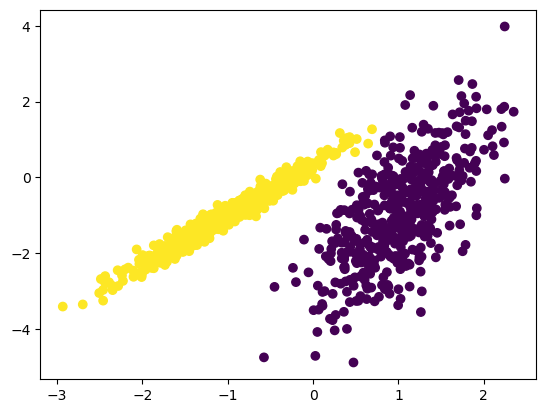

In [44]:
from sklearn.mixture import GaussianMixture

gausmix = GaussianMixture(n_components = 2).fit(X)

means = gausmix.means_
#print(means)
means = gausmix.predict(X)
#print(means)
plt.scatter(X[:,0], X[:,1], c=means)